In [1]:
# get_ipython().magic('matplotlib notebook')
get_ipython().magic('matplotlib inline')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
#___________________________________________________________________________________________________________________
import os
import tripyview as tpv
import shapefile as shp
import numpy as np

In [2]:
# Parameters
mesh_path ='/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
save_path = None #'~/figures/test_papermill/'
save_fname= None

#_____________________________________________________________________________________
which_cycl= 3
which_mode= 'hovm'

#_____________________________________________________________________________________
input_paths= list()
# input_paths.append('/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/')
# input_paths.append('/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.3/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_orig_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_nycander05_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_stormtide2_ck0.1/')
# input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.3/')
# input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_nycander05_ck0.3/')
# input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_stormtide2_ck0.3/')

input_names= list()
# input_names.append('TKE, ck=0.1')
# input_names.append('TKE, ck=0.3')
input_names.append('TKE+IDEMIX, ck=0.1, jayne (old param)')
input_names.append('TKE+IDEMIX, ck=0.1, jayne (new param)')
input_names.append('TKE+IDEMIX, ck=0.1, nycander (new param)')
input_names.append('TKE+IDEMIX, ck=0.1, stormtide (new param)')
# input_names.append('TKE+IDEMIX, ck=0.3, jayne (new param)')
# input_names.append('TKE+IDEMIX, ck=0.3, nycander (new param)')
# input_names.append('TKE+IDEMIX, ck=0.3, stormtide (new param)')

vname     = 'temp'
year      = [1958, 2019]
mon, day, record, box, depth = None, None, None, None, None

#_____________________________________________________________________________________
# do anomaly plots in case ref_path is not None
ref_path  = None #'/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/' # None
ref_name  = None #'TKE, ck=0.1' # None
ref_year  = None # [2009,2019]
ref_mon, ref_day, ref_record = None, None, None

#_____________________________________________________________________________________
box_region = list()
box_region.append('global')
# box_region.append('ocean_basins/Arctic_Basin.shp')
# box_region.append('ocean_basins/Eurasian_Basin.shp')
# box_region.append('mpas_region/Canada_Basin.shp')
# box_region.append('mpas_region/North_Atlantic_Ocean.shp')
# box_region.append('mpas_region/Greenland_Sea.shp')
# box_region.append('mpas_region/Irminger_Sea.shp')
# box_region.append('mpas_region/Norwegian_Sea.shp')
# box_region.append('mpas_region/Labrador_Sea.shp')
# box_region.append('mpas_region/North_Pacific_Ocean.shp')
# box_region.append('mpas_region/South_Pacific_Ocean.shp')
# box_region.append('mpas_region/Southern_Ocean.shp')
# box_region.append('mpas_region/Western_Weddell_Sea.shp')

#_____________________________________________________________________________________
cstr      = 'blue2red'
cnum      = 20
cref      = None
crange, cmin, cmax, cfac = None, None, None, None

#_____________________________________________________________________________________
ncolumn   = 3 
do_rescale= True
which_dpi = 300

In [3]:
#___LOAD FESOM2 MESH___________________________________________________________________________________
mesh=tpv.load_mesh_fesom2(mesh_path, do_rot='None', focus=0, do_info=True, do_pickle=True,
                      do_earea=True, do_narea=True, do_eresol=[True,'mean'], do_nresol=[True,'eresol'])

#______________________________________________________________________________________________________
if which_cycl is not None: 
    for ii,ipath in enumerate(input_paths):
        input_paths[ii] = os.path.join(ipath,'{:d}/'.format(which_cycl))
        print(ii, input_paths[ii])
    
    if ref_path is not None:
        ref_path = os.path.join(ref_path,'{:d}/'.format(which_cycl))
        print('R', ref_path)
        
#______________________________________________________________________________________________________        
cinfo=dict({'cstr':cstr, 'cnum':cnum}) 
if crange   is not None: cinfo['crange']=crange
if cmin     is not None: cinfo['cmin'  ]=cmin
if cmax     is not None: cinfo['cmax'  ]=cmax
if cref     is not None: cinfo['cref'  ]=cref
if cfac     is not None: cinfo['cfac'  ]=cfac  
if ref_path is not None: cinfo['cref'  ]=0.0    
    
#______________________________________________________________________________________________________
# in case of diff plots
if ref_path is not None:
    if ref_year   is None: ref_year   = year
    if ref_mon    is None: ref_mon    = mon
    if ref_record is None: ref_record = record

#______________________________________________________________________________________________________
# define index regions --> reading shape files
box = list()
shp_path = os.path.join(tpv.__path__[0],'shapefiles/')
for region in box_region:
    if region is 'global' or isinstance(region,list): box.append(region)
    else: 
        print(tpv.__path__[0],region)
        box.append(shp.Reader(os.path.join(shp_path,region)))    

 > found *.pckl file: /work/ollie/pscholz/meshcache_tripyview/core2
 > load  *.pckl file: tripyview_fesom2_core2.pckl
___FESOM2 MESH INFO________________________
 > path            = /work/ollie/projects/clidyn/FESOM2/meshes/core2
 > id              = core2
 > do rot          = None
 > [al,be,ga]      = 50, 15, -90
 > do augmpbnd     = True
 > do cavity       = False
 > do lsmask       = True
 > do earea,eresol = True, True
 > do narea,nresol = True, True
___________________________________________
 > #node           = 126858
 > #elem           = 244659
 > #lvls           = 48
___________________________________________
0 /home/ollie/pscholz/results/trr181_tke+idemix_orig_ck0.1/3/
1 /home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.1/3/
2 /home/ollie/pscholz/results/trr181_tke+idemix_nycander05_ck0.1/3/
3 /home/ollie/pscholz/results/trr181_tke+idemix_stormtide2_ck0.1/3/


In [4]:
#___LOAD FESOM2 REFERENCE DATA________________________________________________________________________
if ref_path is not None:
    data_ref = tpv.load_data_fesom2(mesh, ref_path, vname=vname, year=ref_year, mon=ref_mon, 
                                descript=ref_name, do_tarithm='None', do_zarithm='None', do_info=False) 
    data_ref = tpv.load_index_fesom2(mesh, data_ref, box)

#___LOAD FESOM2 DATA___________________________________________________________________________________
list_hovm  = list()
for datapath, descript in zip(input_paths, input_names):
    data = tpv.load_data_fesom2(mesh, datapath, vname=vname, year=year, mon=mon, 
                            descript=descript, do_tarithm='None', do_zarithm='None', do_info=False)
    data_hovm = tpv.load_index_fesom2(mesh, data, box)
    
    #_________________________________________________________________________________________________
    if ref_path is not None: 
        list_hovm.append(tpv.do_indexanomaly(data_hovm, data_ref))
    else: 
        list_hovm.append(data_hovm)
    del(data, data_hovm)
    
if ref_path is not None: del(data_ref)    

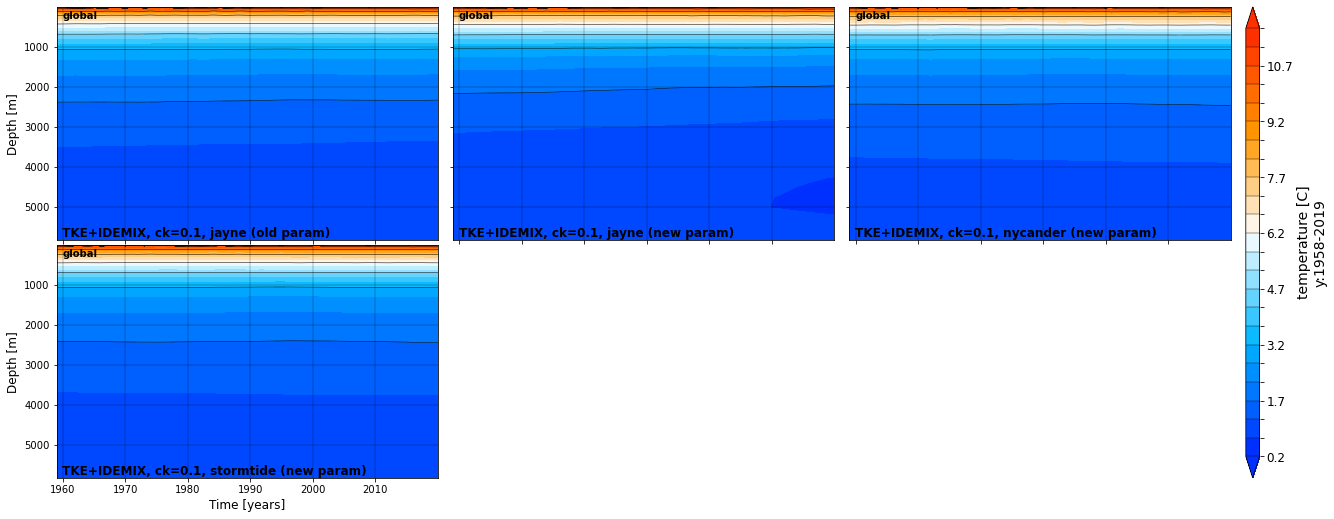

In [5]:
#___PLOT HOVM__________________________________________________________________________________________
spath  = save_path
sname  = vname
slabel = list_hovm[0][0][sname].attrs['str_lsave']
sbox   = list_hovm[0][0][vname].attrs['boxname'].replace(' ','_').lower()
if spath is not None: spath  = '{}/{}_{}_{}_{}.png'.format(spath, which_mode, sname, sbox, slabel) 
nrow   = np.ceil(len(list_hovm)/ncolumn).astype('int')
if save_fname is not None: spath = save_fname
fig, ax, cbar = tpv.plot_index_hovm(list_hovm, box, cinfo=cinfo, figsize=[ncolumn*7, nrow*3.5], n_rc=[nrow, ncolumn], 
                                pos_gap=[0.01, 0.01], pos_extend=[0.05, 0.08, 0.97,0.95],
                                do_save = spath, save_dpi=which_dpi )